In [2]:
import math
import numpy as np
import json
import pandas as pd
import glob

from src.constants import OUTPUTS_DIR

In [6]:
experiment_file = OUTPUTS_DIR / "estimate_convcode_conditional_entropy_variable_block_len.json"

In [7]:
with open(experiment_file, "r") as e:
    results = json.load(e)

exp_results = pd.DataFrame([{**d["results"], **d["preamble"]["args"] }for d in results["data"]])

snr_vals = [4.0]
exp_results = exp_results[exp_results["snr"].isin(snr_vals)]
exp_results = exp_results[["ce__mean", "ce__err", "block_len", "encoder_name", "snr"]]

In [8]:
exp_results.head()

,ce__mean,ce__err,block_len,encoder_name,snr
1,0.027776,0.000759,5,conv_15_7_00,4.0
7,0.029355,0.000825,5,conv_75_1_00,4.0
13,0.078937,0.001224,5,conv_56_1_11,4.0
19,0.067819,0.000891,5,conv_16_5_11,4.0
25,0.035452,0.000710,5,conv_15_1_10,4.0


/tmp/ipykernel_4774/2539667478.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


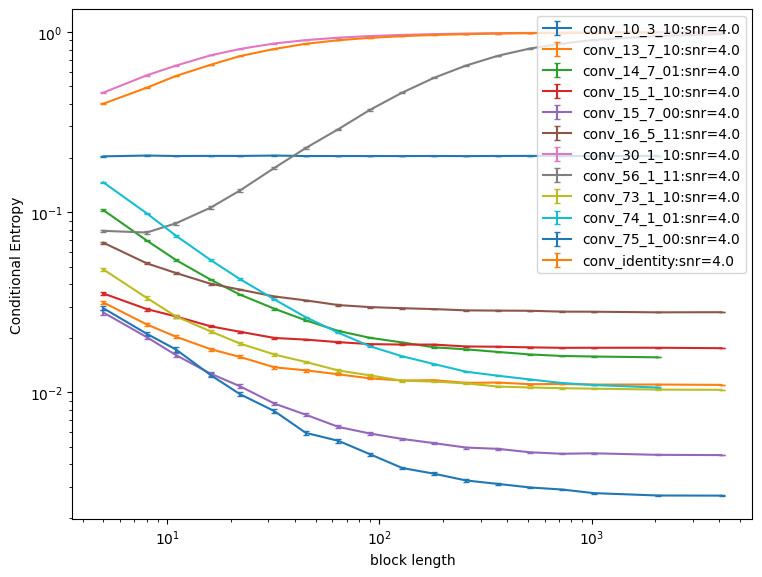

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
capsize = 2

for (encoder_name, snr), exp_result in exp_results.groupby(["encoder_name", "snr"]):
    ax.errorbar(
        exp_result["block_len"], 
        exp_result["ce__mean"], 
        yerr=exp_result["ce__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"{encoder_name}:snr={snr}"
    )
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('block length')
ax.set_ylabel('Conditional Entropy')

fig.show()